# USGS Earthquake Web Scraping & Analysis

**Course:** Data Science Programming CMP-262  
**Student:** Alexandra Lawler  

## Project Overview

In this project, I scraped data from the U.S. Geological Survey (USGS) Earthquake Catalog and analyzed recent and later global earthquake activity.

I focus on M4.5+ earthquakes worldwide between 2020, 2021, and 2022, also one query for M5.5+ events, and one query for shallow earthquakes (depth < 70 km).

## Data Source

- Base endpoint: https://earthquake.usgs.gov/fdsnws/event/1/query
- API documentation: https://earthquake.usgs.gov/fdsnws/event/1/  

## Research Questions

This notebook addresses the following questions:

1. **Yearly counts:** How many M4.5+ earthquakes occurred worldwide in each year (2020, 2021, 2022)?
2. **Magnitude distribution:** How does the distribution of magnitudes for M4.5+ earthquakes compare across those three years?
3. **Depth vs magnitude:** Is there any relationship between earthquake depth and magnitude for M4.5+ events from 2020–2022?
4. **Shallow vs deep earthquakes:** For M4.5+ earthquakes between 2020 and 2022, how do shallow (<70 km) and deep (≥70 km) earthquakes differ in their counts and average magnitudes?
5. **Regional activity (optional):** Which regions based on the `place` description see the most M4.5+ earthquakes?

## Conclusion
- From the USGS earthquake data, 2021 had the most M4.5+ earthquakes (8,922), with 2020 at 6,479 and 2022 at 7,748. The magnitude distributions looked pretty similar across all three years, and the depth vs magnitude plot did not show any clear patten.
- Shallow earthquakes (<70 km) were much more common than deep ones, with 18,686 shallow events compared to 4,463 deep events, and both groups had almost the same average magnitude which was around 4.8.


In [17]:
#Importing python libararie for data scraping
import time
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Using Seaborn for styling
sns.set_theme(style="whitegrid", context="talk")

#Base USGS endpoint for Earthquake FDSN Event Web Service
BASE_USGS_URL = "https://earthquake.usgs.gov/fdsnws/event/1/query"

#The 5 different pages of csv urls that I am scraping
URLS = {
    "2020_M4.5plus": f"{BASE_USGS_URL}?format=csv&starttime=2020-01-01&endtime=2020-12-31&minmagnitude=4.5",
    "2021_M4.5plus": f"{BASE_USGS_URL}?format=csv&starttime=2021-01-01&endtime=2021-12-31&minmagnitude=4.5",
    "2022_M4.5plus": f"{BASE_USGS_URL}?format=csv&starttime=2022-01-01&endtime=2022-12-31&minmagnitude=4.5",
    "2020_M5.5plus": f"{BASE_USGS_URL}?format=csv&starttime=2020-01-01&endtime=2020-12-31&minmagnitude=5.5",
    "2020_2022_M4.5plus_shallow": f"{BASE_USGS_URL}?format=csv&starttime=2020-01-01&endtime=2022-12-31&minmagnitude=4.5&maxdepth=70",
}
#To identify that this is a student scraping their website for educational purposes
HEADERS = {
    "User-Agent": "CCM-DataSci-Project-Lawler (educational use)"
}

In [37]:
#Fetching a CSV file from USGS
def fetch_earthquake_csv(url, label=None):
    print(f"Fetching: {url}")
#Sending a HTTP GET request to the CSV URL
    resp = requests.get(url, headers=HEADERS, timeout=60)
    resp.raise_for_status()
    # Read CSV into DataFrame directly from text
    df = pd.read_csv(pd.compat.StringIO(resp.text)) if hasattr(pd, "compat") else pd.read_csv(pd.io.common.StringIO(resp.text))
#Adding a label column to track which URL the data came from
    if label is not None:
        df["source_label"] = label
#Adding a delay to avoid overwhelming the websites server
    time.sleep(1)
    return df

In [23]:
#To store the downloaded DataFrames
dataframes = {}

#Going through each URL and scraping the CSV
for label, url in URLS.items():

#Download and convert the CSV files to a DataFrame
    df = fetch_earthquake_csv(url, label=label)
    print(label, "rows:", len(df))
    dataframes[label] = df

#Previewing the amount of rows of data
dataframes["2020_M4.5plus"].head()

2020_M4.5plus rows: 6479
2021_M4.5plus rows: 8922
2022_M4.5plus rows: 7748
2020_M5.5plus rows: 405
2020_2022_M4.5plus_shallow rows: 18711


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,source_label
0,2020-12-30T23:03:00.251Z,5.1231,125.2581,54.13,4.6,mb,NaN,108.0,1.960,0.45,...,"38 km SW of Sarangani, Philippines",earthquake,5.3,9.1,0.133,17.0,reviewed,us,us,2020_M4.5plus
1,2020-12-30T21:58:16.073Z,-1.2508,-13.6612,10.00,4.7,mb,NaN,74.0,6.585,0.67,...,north of Ascension Island,earthquake,7.9,1.9,0.138,16.0,reviewed,us,us,2020_M4.5plus
2,2020-12-30T21:27:32.633Z,7.6359,126.9172,53.27,4.6,mb,NaN,116.0,1.441,0.80,...,"40 km E of Baganga, Philippines",earthquake,8.9,7.7,0.091,36.0,reviewed,us,us,2020_M4.5plus
3,2020-12-30T20:29:33.321Z,-6.6907,127.4441,393.38,4.5,mb,NaN,56.0,4.033,1.13,...,"208 km NNE of Lospalos, Timor Leste",earthquake,7.3,8.8,0.243,5.0,reviewed,us,us,2020_M4.5plus
4,2020-12-30T19:36:05.266Z,-6.8738,147.6965,68.44,4.5,mb,NaN,45.0,2.570,0.98,...,"38 km SSW of Finschhafen, Papua New Guinea",earthquake,8.1,6.4,0.102,28.0,reviewed,us,us,2020_M4.5plus


In [38]:
from io import StringIO

def fetch_earthquake_csv(url, label=None):
    resp = requests.get(url, headers=HEADERS, timeout=60)
    resp.raise_for_status()
    df = pd.read_csv(StringIO(resp.text))
    if label is not None:
        df["source_label"] = label
    time.sleep(1)
    return df

In [39]:
#Combining the years 2020, 2021, 2022 M4.5+ for yearly comparisons
frames_to_combine = [
    dataframes["2020_M4.5plus"].assign(year=2020),
    dataframes["2021_M4.5plus"].assign(year=2021),
    dataframes["2022_M4.5plus"].assign(year=2022),
]
#Concatenating the DataFrames into one DataFrame
eq_yearly = pd.concat(frames_to_combine, ignore_index=True)

#Converting time column to datetime
eq_yearly["time"] = pd.to_datetime(eq_yearly["time"], errors="coerce")

eq_yearly[["time", "latitude", "longitude", "mag", "depth", "year"]].head()

,time,latitude,longitude,mag,depth,year
0,2020-12-30 23:03:00.251000+00:00,5.1231,125.2581,4.6,54.13,2020
1,2020-12-30 21:58:16.073000+00:00,-1.2508,-13.6612,4.7,10.00,2020
2,2020-12-30 21:27:32.633000+00:00,7.6359,126.9172,4.6,53.27,2020
3,2020-12-30 20:29:33.321000+00:00,-6.6907,127.4441,4.5,393.38,2020
4,2020-12-30 19:36:05.266000+00:00,-6.8738,147.6965,4.5,68.44,2020


## Q1: How many M4.5+ earthquakes per year?

In [25]:
#Grouping by year and the count of the number of events in each year
counts_by_year = eq_yearly.groupby("year")["id"].count().reset_index()
#Renaming the columns for easier readability
counts_by_year.columns = ["year", "count"]
counts_by_year

,year,count
0,2020,6479
1,2021,8922
2,2022,7748


/var/folders/7y/gmc42dqd3jsfhb8pmwq1fv3r0000gn/T/ipykernel_40658/3486594847.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=counts_by_year, x="year", y="count", palette="viridis")


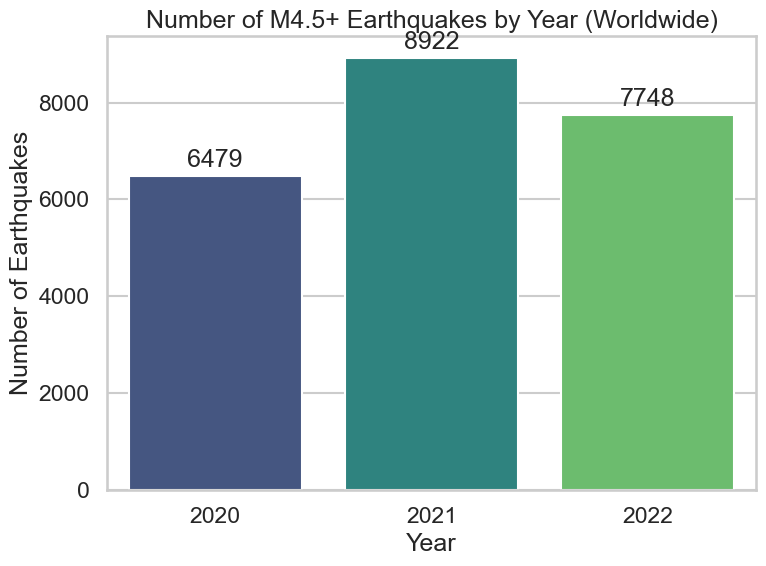

In [26]:
#Bar plot that shows the number of M4.5+ earthquakes per year
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=counts_by_year, x="year", y="count", palette="viridis")

ax.set_title("Number of M4.5+ Earthquakes by Year (Worldwide)")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Earthquakes")

#Labels for the bars in the graph
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", padding=3)

plt.tight_layout()
plt.show()

## Q2: Magnitude Distribution by year (M4.5+)

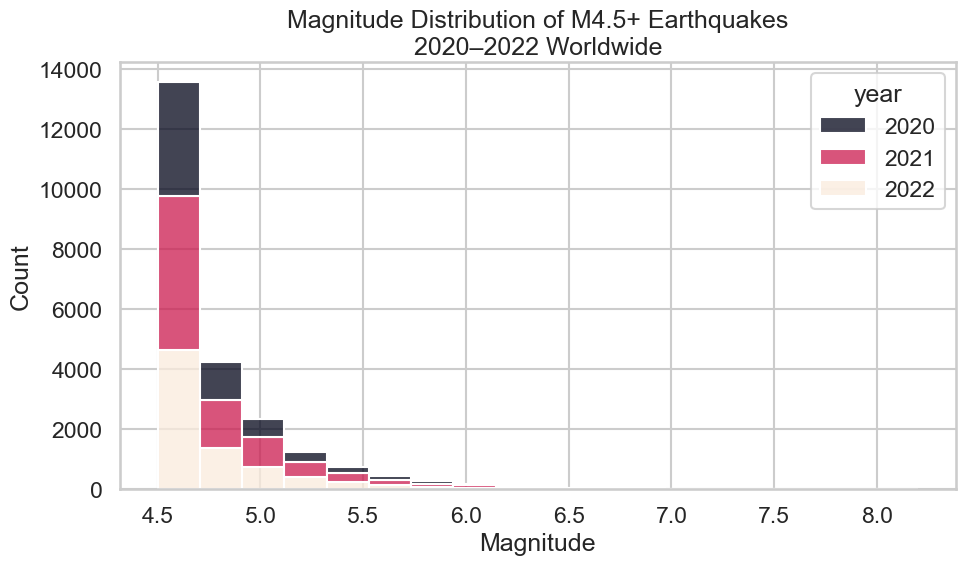

In [27]:
#Plotting a histogram that shows the magnitude distribution for each year
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=eq_yearly,
    x="mag",
    hue="year",
    multiple="stack",
    binwidth=0.2,
    palette="rocket"
)

ax.set_title("Magnitude Distribution of M4.5+ Earthquakes\n2020–2022 Worldwide")
ax.set_xlabel("Magnitude")
ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

## Q3: Depth vs magnitude (all yearly M4.5+)

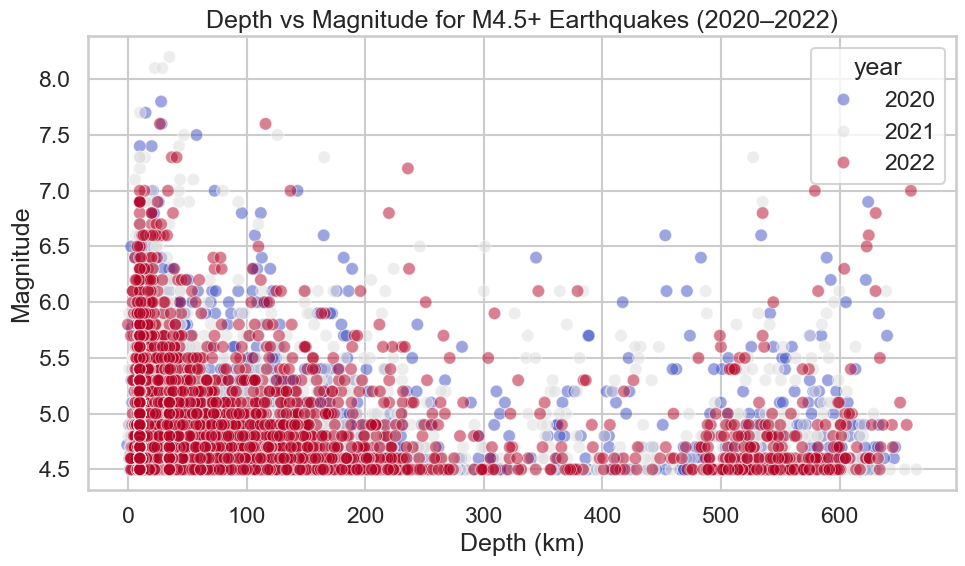

In [28]:
#Creating a scatterplot to see if there is any relationship between
#depth and magnitude
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    data=eq_yearly,
    x="depth",
    y="mag",
    hue="year",
    alpha=0.5,
    palette="coolwarm"
)

ax.set_title("Depth vs Magnitude for M4.5+ Earthquakes (2020–2022)")
ax.set_xlabel("Depth (km)")
ax.set_ylabel("Magnitude")

plt.tight_layout()
plt.show()

## Q4: Shallow (<70 km) vs deeper quakes, and their magnitudes

In [32]:
import numpy as np

#Creating a shallow vs deep category
eq_depth = eq_yearly.dropna(subset=["depth"]).copy()

#Categorizing each earthquake as shallow or deep
eq_depth["depth_category"] = np.where(
    eq_depth["depth"] < 70,
    "Shallow (<70 km)",
    "Deep (>=70 km)"
)

eq_depth[["mag", "depth", "depth_category"]].head()

,mag,depth,depth_category
0,4.6,54.13,Shallow (<70 km)
1,4.7,10.00,Shallow (<70 km)
2,4.6,53.27,Shallow (<70 km)
3,4.5,393.38,Deep (>=70 km)
4,4.5,68.44,Shallow (<70 km)


In [33]:
#grouping by the shallow vs deep and getting the total
#count and average magnitude
depth_stats = eq_depth.groupby("depth_category").agg(
    count=("id", "count"),
    avg_mag=("mag", "mean")
).reset_index()

depth_stats

,depth_category,count,avg_mag
0,Deep (>=70 km),4463,4.762274
1,Shallow (<70 km),18686,4.810707


/var/folders/7y/gmc42dqd3jsfhb8pmwq1fv3r0000gn/T/ipykernel_40658/4121249974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


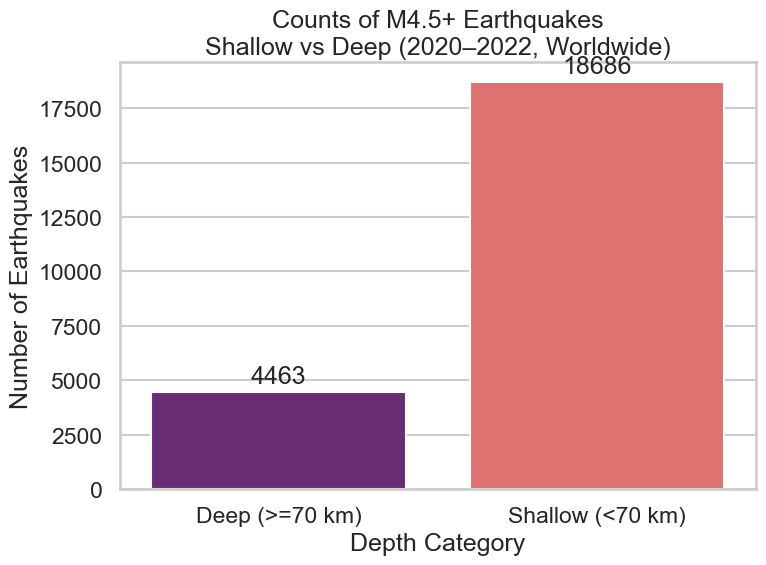

In [34]:
# Bar graph to plot the average magnitude for shallow and deep
#earthquakes
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=depth_stats,
    x="depth_category",
    y="count",
    palette="magma"
)

ax.set_title("Counts of M4.5+ Earthquakes\nShallow vs Deep (2020–2022, Worldwide)")
ax.set_xlabel("Depth Category")
ax.set_ylabel("Number of Earthquakes")

for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", padding=3)

plt.tight_layout()
plt.show()

/var/folders/7y/gmc42dqd3jsfhb8pmwq1fv3r0000gn/T/ipykernel_40658/1908302221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


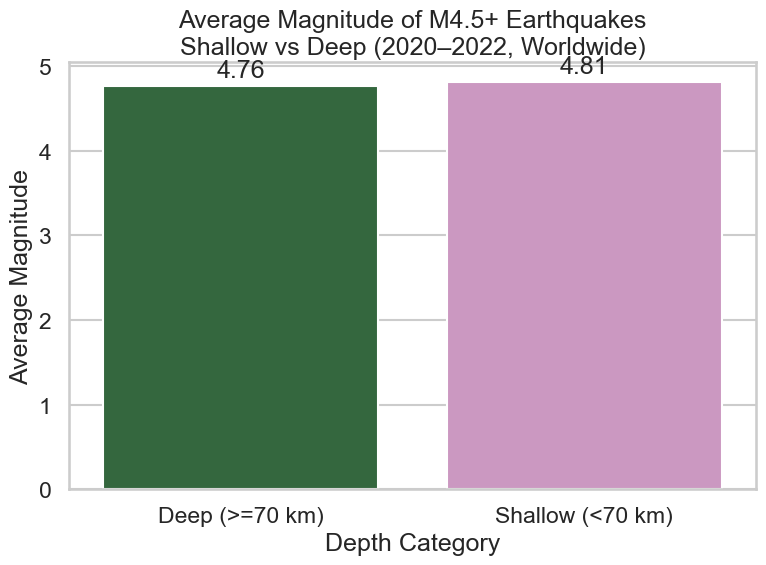

In [35]:
#Bar graph to plot the count of shallow vs deep earthquakes
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=depth_stats,
    x="depth_category",
    y="avg_mag",
    palette="cubehelix"
)

ax.set_title("Average Magnitude of M4.5+ Earthquakes\nShallow vs Deep (2020–2022, Worldwide)")
ax.set_xlabel("Depth Category")
ax.set_ylabel("Average Magnitude")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3)

plt.tight_layout()
plt.show()

# Works Cited:
USGS Earthquake:
https://earthquake.usgs.gov/fdsnws/event/1/

https://pandas.pydata.org/docs/

https://pandas.pydata.org/docs/user_guide/io.html#reading-from-a-buffer

https://pandas.pydata.org/docs/reference/api/pandas.concat.html

https://pandas.pydata.org/docs/user_guide/groupby.html#aggregation

https://requests.readthedocs.io/en/latest/user/quickstart/#errors-and-exceptions

https://requests.readthedocs.io/en/latest/

https://seaborn.pydata.org/tutorial.html

https://seaborn.pydata.org/generated/seaborn.barplot.html

https://seaborn.pydata.org/generated/seaborn.histplot.html

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

https://matplotlib.org/stable/

https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html

https://stackoverflow.com/

